In [44]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
from matplotlib import colormaps
import streamlit as st

In [3]:
jamming_1 = pd.read_csv('active-gaussian-jamming/5805mhz_jamming_10dbm_gaussiannoise_1.csv')
jamming_2 = pd.read_csv('active-gaussian-jamming/5805mhz_jamming_10dbm_gaussiannoise_2.csv')
jamming_3 = pd.read_csv('active-gaussian-jamming/5805mhz_jamming_10dbm_gaussiannoise_3.csv')

benign_1 = pd.read_csv('active-benign-background/5ghz_activescan_background_loc1_1.csv')
benign_2 = pd.read_csv('active-benign-background/5ghz_activescan_background_loc1_2.csv')
benign_3 = pd.read_csv('active-benign-background/5ghz_activescan_background_loc1_3.csv')

In [4]:
benign_1

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db
0,5805,-108,60,87,380,7,8,56
1,5805,-108,48,87,380,5,10,55
2,5805,-108,54,87,380,5,8,55
3,5805,-108,52,87,380,7,9,55
4,5805,-108,48,87,380,5,11,56
...,...,...,...,...,...,...,...,...
29995,5805,-108,71,90,377,5,10,58
29996,5805,-108,57,90,377,5,11,57
29997,5805,-108,55,90,377,3,9,57
29998,5805,-108,74,90,377,4,9,57


In [5]:
jamming_1

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db
0,5805,-102,34,38,422,54,16,59
1,5805,-102,51,40,421,51,15,61
2,5805,-102,44,39,421,52,14,60
3,5805,-102,41,39,421,51,14,60
4,5805,-102,36,38,422,52,17,59
...,...,...,...,...,...,...,...,...
29995,5805,-102,40,37,423,53,15,58
29996,5805,-102,38,38,422,53,14,58
29997,5805,-102,40,37,424,55,15,58
29998,5805,-102,41,38,422,53,14,59


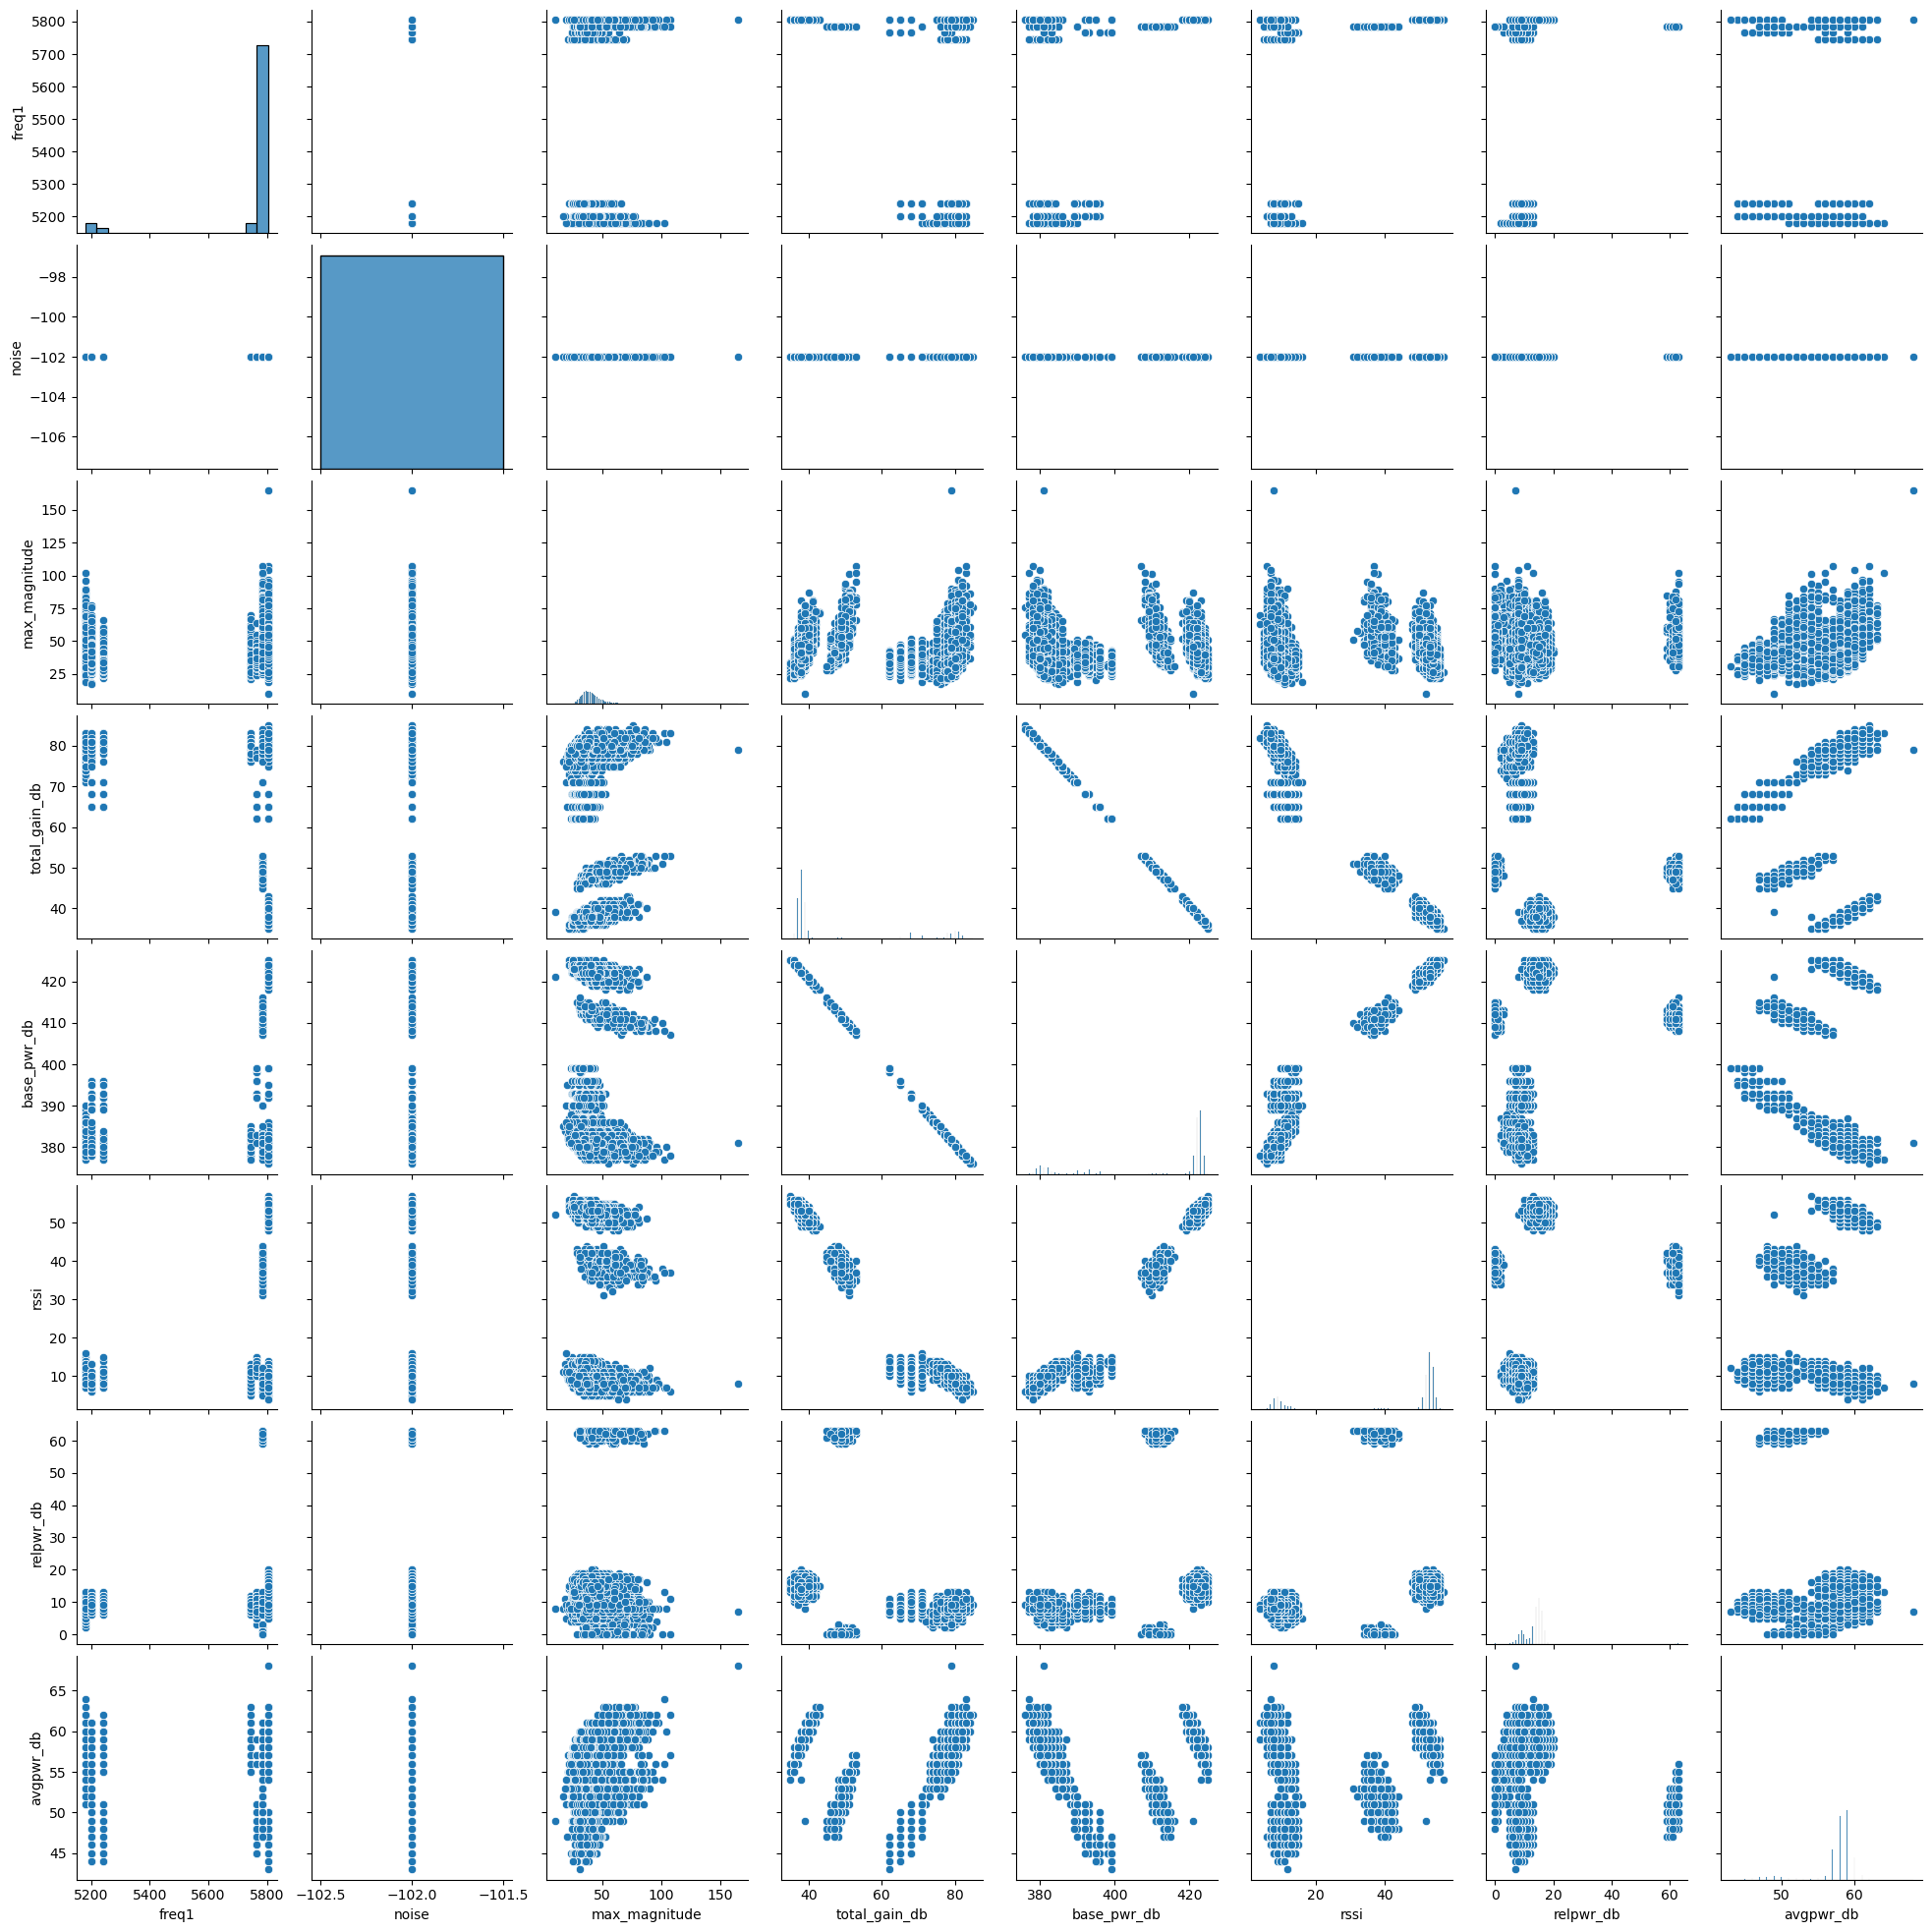

In [6]:
sns.pairplot(jamming_1)

## The below plots all look relatively the same, but lets see what happens if I remove the frequency column

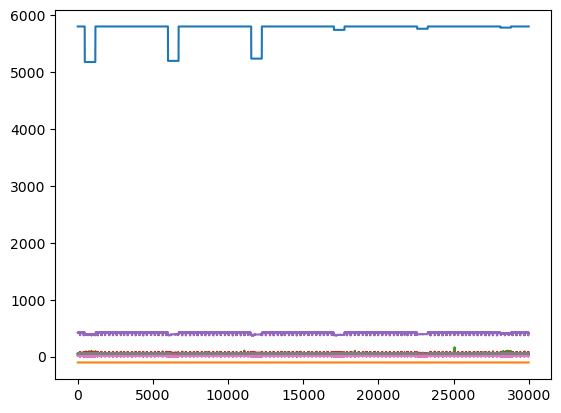

In [7]:
plt.plot(jamming_1)

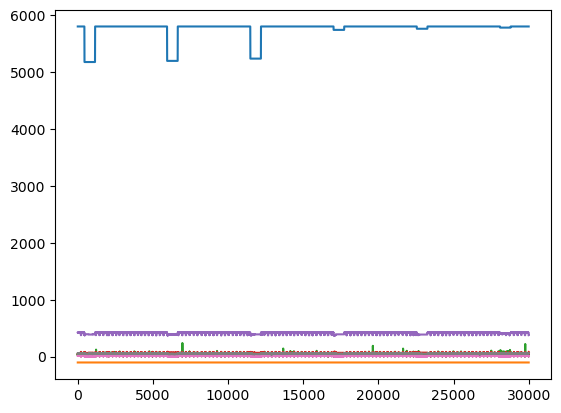

In [8]:
plt.plot(jamming_2)

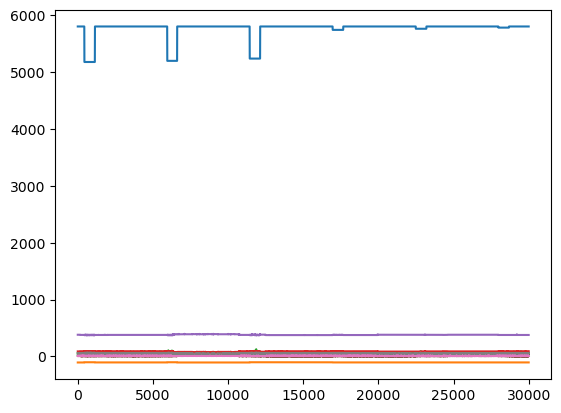

In [9]:
plt.plot(benign_2)

In [10]:
benign_1.head(5)

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db
0,5805,-108,60,87,380,7,8,56
1,5805,-108,48,87,380,5,10,55
2,5805,-108,54,87,380,5,8,55
3,5805,-108,52,87,380,7,9,55
4,5805,-108,48,87,380,5,11,56


<Axes: >

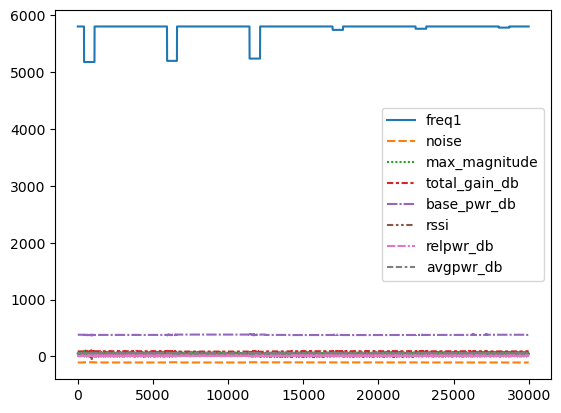

In [11]:
sns.lineplot(benign_1)

Text(0.5, 1.0, 'Benign example at 5.8 GHz')

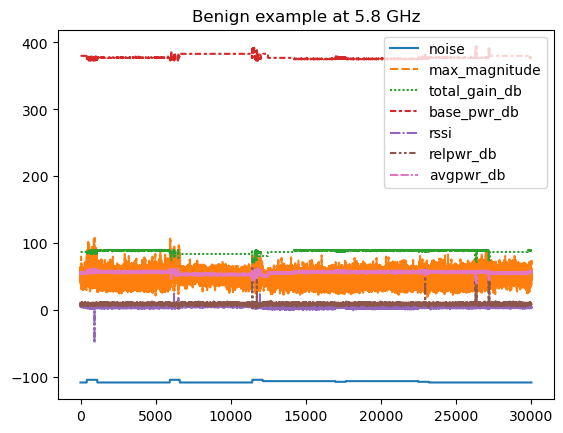

In [12]:
test = benign_1.drop('freq1', axis=1)
sns.lineplot(test)
plt.title('Benign example at 5.8 GHz')

Text(0.5, 1.0, 'Jamming example at 5.8 GHz')

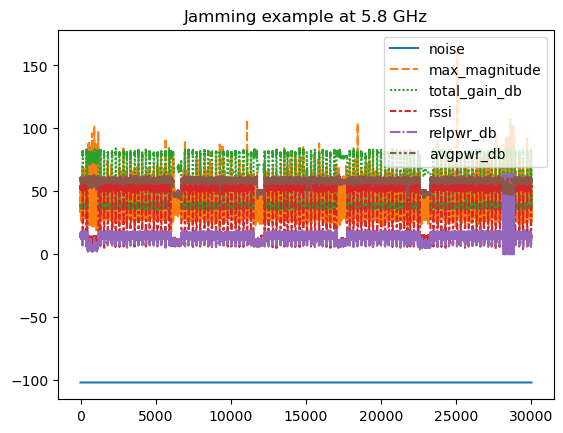

In [13]:
jamming_test = jamming_1.drop('freq1', axis=1)
jamming_test2 = jamming_test.drop('base_pwr_db', axis=1)
sns.lineplot(jamming_test2)
plt.title('Jamming example at 5.8 GHz')

## Wow! A lot more going on in the intentional jamming one. Makes sense I guess!

Text(0.5, 1.0, 'Benign jamming at 5.8 GHz')

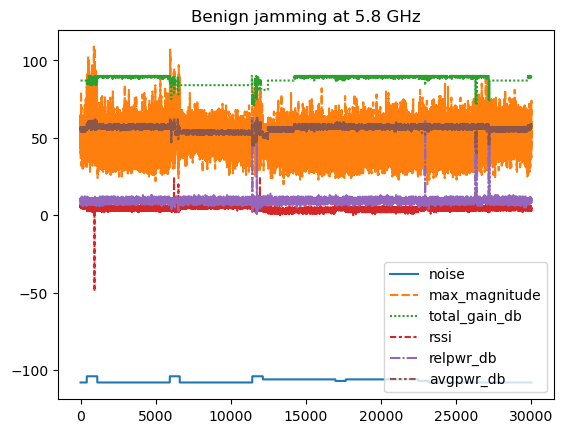

In [14]:
benign_test = benign_1.drop(['freq1', 'base_pwr_db'], axis=1)
sns.lineplot(benign_test)
plt.title('Benign jamming at 5.8 GHz')

## Much better. You can tell there is a clear difference between the benign and jamming

### Lets try to plot just the main signal and add a spectrogram

In [16]:
max_magnitude = jamming_test['max_magnitude']

In [17]:
max_magnitude_array = max_magnitude.to_numpy()

Text(0, 0.5, 'Frequency [Hz]')

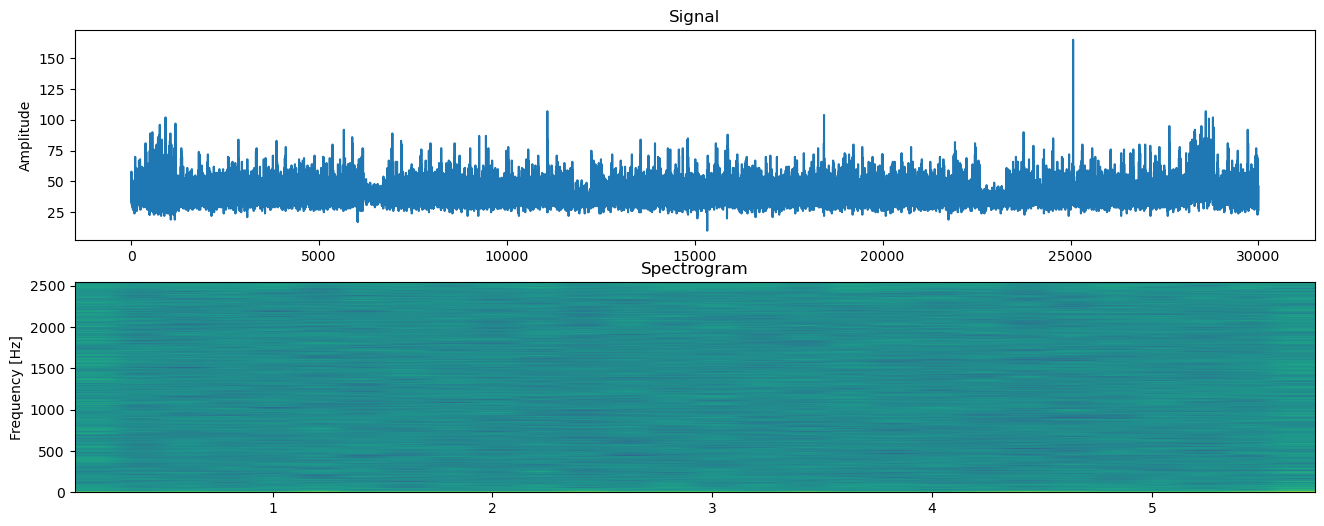

In [18]:
NFFT = 2048
dt = 0.0001967
Fs = 1/dt
sample_length = 30000
sample_ylim = 150

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,6))
ax1.plot(max_magnitude_array)
ax1.set_title('Signal')
ax1.set_ylabel('Amplitude')

Pxx, freqs, bins, im = ax2.specgram(max_magnitude_array, NFFT=NFFT, Fs=Fs, noverlap=NFFT//2)

ax2.set_title('Spectrogram')
ax2.set_ylabel('Frequency [Hz]')
# plt.xlim(0, sample_length)
# plt.ylim(0, sample_ylim)


In [19]:
max_magnitude_array

array([34, 51, 44, ..., 40, 41, 46], dtype=int64)

Text(0, 0.5, 'Frequency (Hz)')

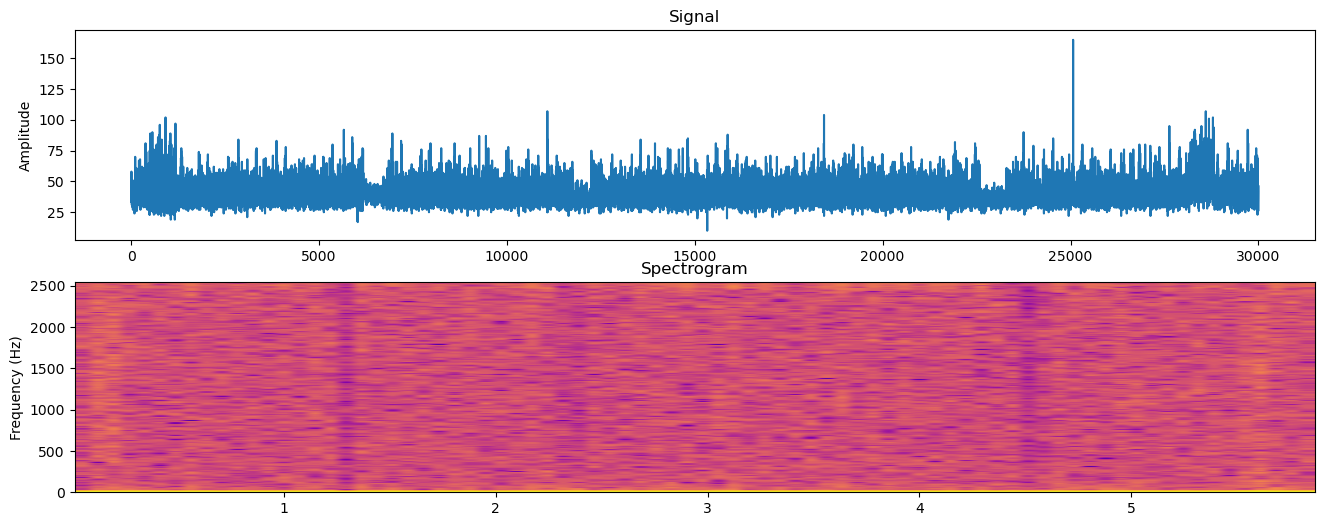

In [20]:
NFFT = 500
dt = 0.0001967
Fs = 1 / dt

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,6))
ax1.plot(max_magnitude_array)
ax1.set_title('Signal')
ax1.set_ylabel('Amplitude')

Pxx, freqs, bins, im = ax2.specgram(max_magnitude_array, NFFT=NFFT, Fs=Fs, cmap='plasma')

ax2.set_title('Spectrogram')
ax2.set_ylabel('Frequency (Hz)')

### Gonna have to come back to that

In [21]:
jamming_test

,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db
0,-102,34,38,422,54,16,59
1,-102,51,40,421,51,15,61
2,-102,44,39,421,52,14,60
3,-102,41,39,421,51,14,60
4,-102,36,38,422,52,17,59
...,...,...,...,...,...,...,...
29995,-102,40,37,423,53,15,58
29996,-102,38,38,422,53,14,58
29997,-102,40,37,424,55,15,58
29998,-102,41,38,422,53,14,59


In [22]:
benign_test

,noise,max_magnitude,total_gain_db,rssi,relpwr_db,avgpwr_db
0,-108,60,87,7,8,56
1,-108,48,87,5,10,55
2,-108,54,87,5,8,55
3,-108,52,87,7,9,55
4,-108,48,87,5,11,56
...,...,...,...,...,...,...
29995,-108,71,90,5,10,58
29996,-108,57,90,5,11,57
29997,-108,55,90,3,9,57
29998,-108,74,90,4,9,57


### Moving on to the regression model

In [23]:
jamming_test['label'] = 1
benign_test['label'] = 0

data = pd.concat([jamming_test, benign_test])
data = data.drop(['base_pwr_db'], axis=1)

In [24]:
X = data.drop(['label'], axis=1)
y = data['label']

In [49]:
data

,noise,max_magnitude,total_gain_db,rssi,relpwr_db,avgpwr_db,label
0,-102,34,38,54,16,59,1
1,-102,51,40,51,15,61,1
2,-102,44,39,52,14,60,1
3,-102,41,39,51,14,60,1
4,-102,36,38,52,17,59,1
...,...,...,...,...,...,...,...
29995,-108,71,90,5,10,58,0
29996,-108,57,90,5,11,57,0
29997,-108,55,90,3,9,57,0
29998,-108,74,90,4,9,57,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [27]:
model.predict_proba(X_test)

array([[0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.43496139e-12],
       [1.00000000e+00, 5.59294144e-12],
       ...,
       [1.74079123e-06, 9.99998259e-01],
       [8.47431195e-05, 9.99915257e-01],
       [0.00000000e+00, 1.00000000e+00]])

In [28]:
y_pred = model.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9056
           1       1.00      1.00      1.00      8944

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



In [30]:
print(confusion_matrix(y_test, y_pred))

[[9055    1]
 [   0 8944]]


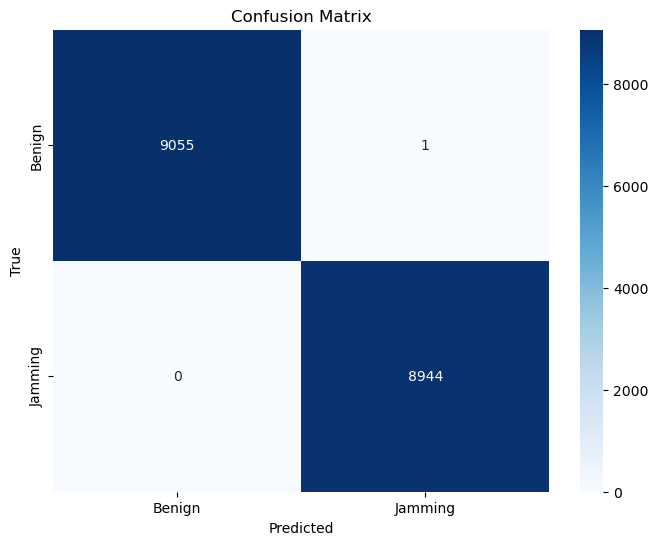

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Jamming'], yticklabels=['Benign', 'Jamming'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [32]:
model.coef_

array([[ 2.83084347, -0.08615209, -1.89906681, -0.33509362, -0.23931811,
         2.02267214]])

### WOW that correlates really well. Should I keep that? It's almost too good... Also missing the values below. Im going to try to test other models, and validate them

In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y)
print(scores)
print(kf)

[0.99991667 0.99958333 1.         1.         1.        ]
KFold(n_splits=5, random_state=42, shuffle=True)


In [34]:
benign = pd.concat([benign_1, benign_2, benign_3], ignore_index=True)
jamming = pd.concat([jamming_1, jamming_2, jamming_3], ignore_index=True)

In [35]:
benign['label'] = 0
jamming['label'] = 1

In [36]:
combined_data = pd.concat([benign, jamming], ignore_index=True)

In [37]:
combined_data.sample(20)

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db,label
106018,5805,-102,45,39,422,52,15,59,1
39130,5805,-108,49,75,391,7,10,47,0
56964,5805,-108,26,87,380,5,10,55,0
22404,5805,-106,34,90,375,4,9,57,0
170904,5805,-102,40,39,421,52,13,58,1
42652,5805,-105,53,90,374,1,8,57,0
104115,5805,-102,31,37,423,54,16,57,1
109522,5805,-102,61,38,422,53,15,58,1
158006,5805,-102,37,38,423,53,15,59,1
46438,5805,-105,60,90,374,2,9,57,0


In [38]:
X1 = combined_data.drop(['label'], axis=1)
y1 = combined_data['label']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

combined_model = LogisticRegression(max_iter=2000, random_state=42)
combined_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [40]:
combined_y_pred = combined_model.predict(X_test)

In [41]:
print(confusion_matrix(y_test, combined_y_pred))

[[26928     0]
 [    0 27072]]


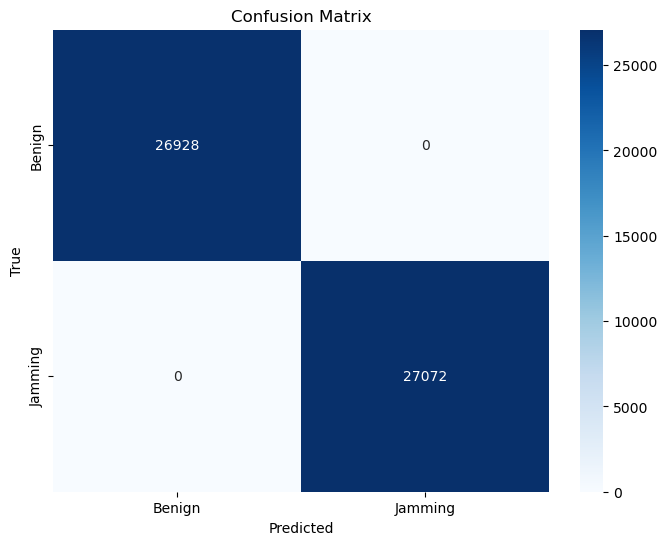

In [42]:
cm = confusion_matrix(y_test, combined_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Jamming'], yticklabels=['Benign', 'Jamming'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
combined_data.describe()

,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db,label
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,5760.549194,-104.478089,44.724783,67.148828,395.991200,23.680383,11.681172,56.753256,0.500000
std,152.002268,2.644735,10.170964,23.463762,21.224683,23.149883,5.220997,2.987368,0.500001
min,5180.000000,-108.000000,5.000000,35.000000,373.000000,-49.000000,0.000000,28.000000,0.000000
25%,5805.000000,-108.000000,37.000000,38.000000,377.000000,4.000000,9.000000,56.000000,0.000000
50%,5805.000000,-103.000000,43.000000,80.000000,383.000000,8.000000,10.000000,58.000000,0.500000
75%,5805.000000,-102.000000,51.000000,90.000000,422.000000,53.000000,14.000000,58.000000,1.000000
max,5805.000000,-102.000000,240.000000,90.000000,426.000000,57.000000,63.000000,72.000000,1.000000
